The minimum cost to visit all cities: 97
The path is: [0, 1, 2, 3, 0]


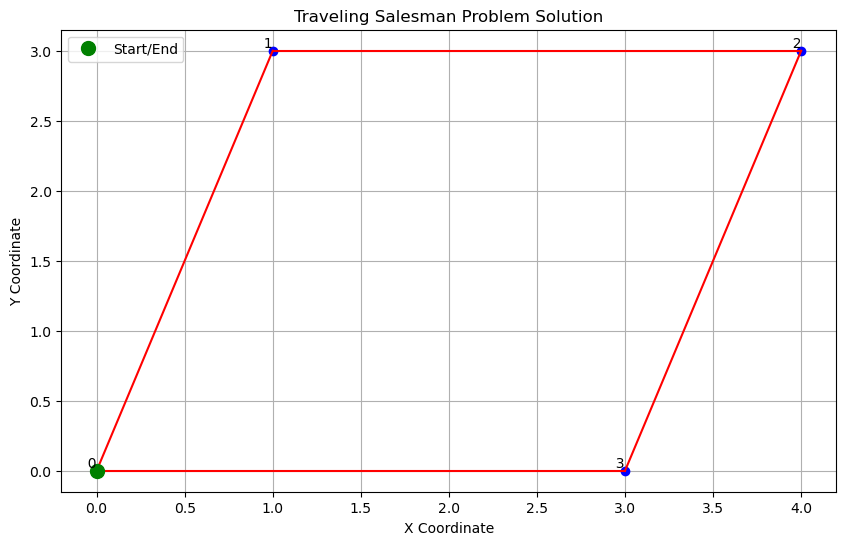

In [10]:
import sys
import matplotlib.pyplot as plt
import numpy as np

class Graph:
    def __init__(self, num_nodes):
        self.num_nodes = num_nodes
        self.adj_matrix = [[0] * num_nodes for _ in range(num_nodes)]
        self.positions = {}  # Dictionary to store positions of nodes for plotting

    def add_edge(self, u, v, weight):
        self.adj_matrix[u][v] = weight
        self.adj_matrix[v][u] = weight  # since it's an undirected graph

    def add_position(self, node, x, y):
        self.positions[node] = (x, y)

def tsp_dp(graph):
    n = graph.num_nodes
    adj_matrix = graph.adj_matrix
    dp = [[None] * n for _ in range(1 << n)]
    parent = [[None] * n for _ in range(1 << n)]  # to reconstruct the path

    def visit(current, visited):
        if visited == (1 << n) - 1:
            return adj_matrix[current][0] if adj_matrix[current][0] > 0 else sys.maxsize

        if dp[visited][current] is not None:
            return dp[visited][current]

        min_cost = sys.maxsize

        for next_node in range(n):
            if visited & (1 << next_node) == 0 and adj_matrix[current][next_node] > 0:
                new_visited = visited | (1 << next_node)
                cost = adj_matrix[current][next_node] + visit(next_node, new_visited)
                if cost < min_cost:
                    min_cost = cost
                    parent[visited][current] = next_node

        dp[visited][current] = min_cost
        return min_cost

    min_cost = visit(0, 1)

    # Reconstruct the path
    path = []
    visited = 1
    current = 0
    while True:
        path.append(current)
        next_node = parent[visited][current]
        if next_node is None:
            break
        visited |= (1 << next_node)
        current = next_node
    path.append(0)  # Returning to the starting node

    return min_cost, path

def plot_tsp_solution(graph, path):
    positions = graph.positions
    plt.figure(figsize=(10, 6))

    # Plot nodes
    for node, (x, y) in positions.items():
        plt.plot(x, y, 'bo')
        plt.text(x, y, f'  {node}', verticalalignment='bottom', horizontalalignment='right')

    # Plot path
    for i in range(len(path) - 1):
        x1, y1 = positions[path[i]]
        x2, y2 = positions[path[i + 1]]
        plt.plot([x1, x2], [y1, y2], 'r-')

    # Mark the start node
    start_x, start_y = positions[path[0]]
    plt.plot(start_x, start_y, 'go', markersize=10, label="Start/End")

    plt.title("Traveling Salesman Problem Solution")
    plt.xlabel("X Coordinate")
    plt.ylabel("Y Coordinate")
    plt.legend()
    plt.grid()
    plt.show()

# Example usage
if __name__ == "__main__":
    # Create a graph instance with 4 cities
    num_nodes = 4
    graph = Graph(num_nodes)

    # Adding edges (distances) between nodes (cities)
    graph.add_edge(0, 1, 20)
    graph.add_edge(0, 2, 42)
    graph.add_edge(0, 3, 35)
    graph.add_edge(1, 2, 30)
    graph.add_edge(1, 3, 34)
    graph.add_edge(2, 3, 12)

    # Define positions for each city for plotting
    graph.add_position(0, 0, 0)
    graph.add_position(1, 1, 3)
    graph.add_position(2, 4, 3)
    graph.add_position(3, 3, 0)

    # Solve TSP and get the minimum cost and path
    min_cost, path = tsp_dp(graph)
    print("The minimum cost to visit all cities:", min_cost)
    print("The path is:", path)

    # Plot the solution path
    plot_tsp_solution(graph, path)
